In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

df = pd.read_excel("Temporary_data3_Left_Right_Copy.xlsx")
df = df.dropna()

TASK-6A: Please use the latest version of the AD dataset to provide the following outputs:
y : CDRGLOB 
X : all columns except for the label Train-test split: .80-.20 (please use the stratify parameter) Cross-validation both with k=5 and k=10

Please compare and discuss the outputs obtained from the cross validation step by k=5 and k=10.

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))

from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr, X, y, cv=5)
print("Cross-Validation scores: ", scores)
print("Average score: ", scores.mean())

scores = cross_val_score(lr, X, y, cv=10)
print("Cross-Validation scores: ", scores)
print("Average score: ", scores.mean())

Accuracy:  0.5682656826568265
Cross-Validation scores:  [0.59778598 0.56457565 0.64575646 0.61623616 0.52962963]
Average score:  0.5907967746344129
Cross-Validation scores:  [0.58088235 0.63970588 0.61029412 0.52205882 0.71111111 0.66666667
 0.71111111 0.48148148 0.45185185 0.54074074]
Average score:  0.591590413943355


TASK-6B: Please perform a grid search run with the use of a ML algorithm (and its parameters) you select as opposed to the Gaussian Naive Bayes algorithm. Then compare the outputs with respect to the accuracy values.

In [14]:
from sklearn.model_selection import GridSearchCV
parameters = {"C": np.logspace(-3,3,7), "penalty":["l1","l2"]}

clf = GridSearchCV(lr, parameters, cv=5)
clf.fit(X_train, y_train)
print("tuned hpyerparameters :(best parameters) ",clf.best_params_)
print("accuracy :",clf.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2'}
accuracy : 0.6066905615292713


TASK-6C: Please provide a visualization of the best algorithm with respect to the two of the dimensions in the dataset and please annotate the labels. For instance, x-axis might be RPARCORT and y-axis might be LTEMPCOR.

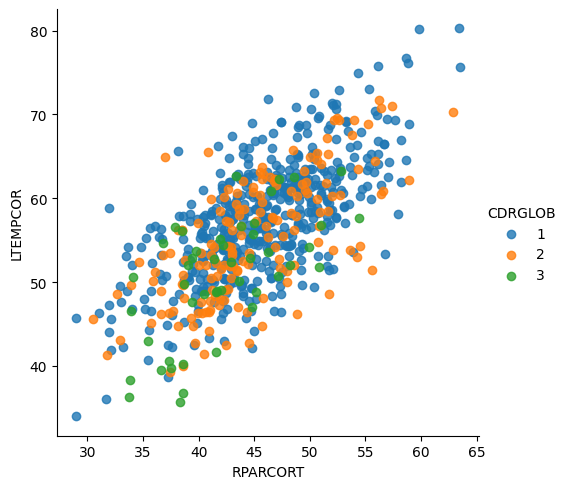

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("Temporary_data3_Left_Right_Copy.xlsx")
df = df.dropna()

df = df[["RPARCORT", "LTEMPCOR", "CDRGLOB"]]
df = df[df["CDRGLOB"] != 0]

sns.lmplot(x="RPARCORT", y="LTEMPCOR", hue="CDRGLOB", data=df, fit_reg=False)
plt.show()

TASK-6D: Please apply one of the dimensionality reduction methods (PCA or isomap) and reduce the features matrix into 2 extracted dimensions. Then provide a visualization with respect to these dimensions.

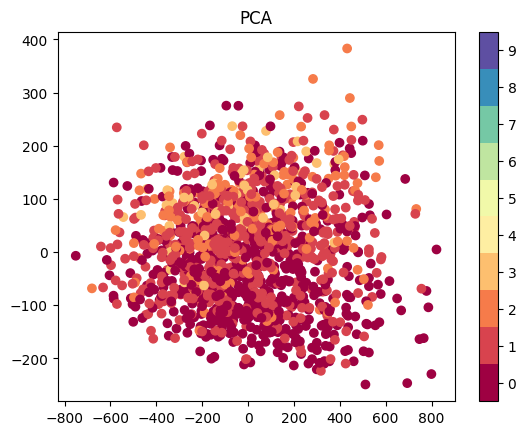

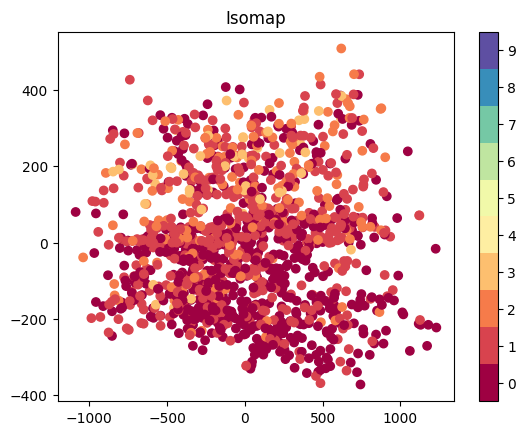

In [21]:
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

isomap = Isomap(n_components=2)
X_iso = isomap.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)
plt.title("PCA")
plt.show()

plt.scatter(X_iso[:, 0], X_iso[:, 1], c=y, cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)
plt.title("Isomap")
plt.show()

TASK-6E: Please perform one of the clustering techniques (k-means or GMM) on the dataset (on the features matrix) then again provide a visual illustration with respect to the features like age, education.

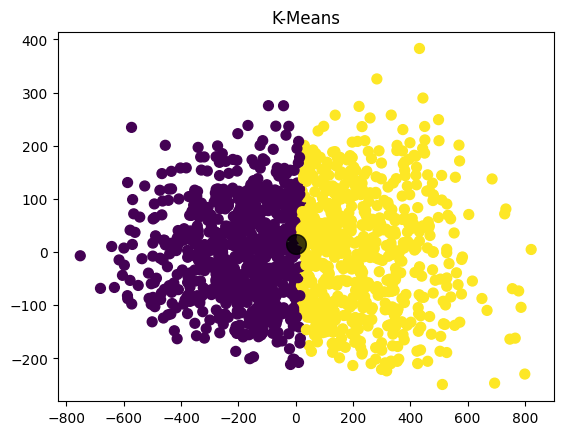

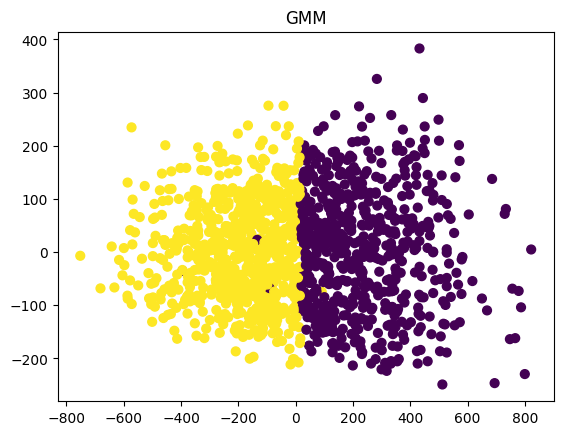

In [23]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.title("K-Means")
plt.show()

from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2)
gmm.fit(X)
y_gmm = gmm.predict(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_gmm, s=40, cmap='viridis');
plt.title("GMM")
plt.show()

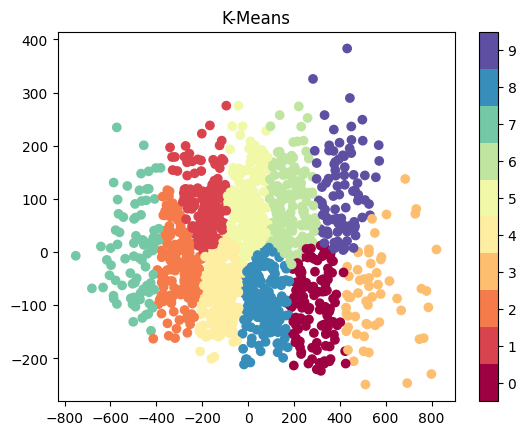

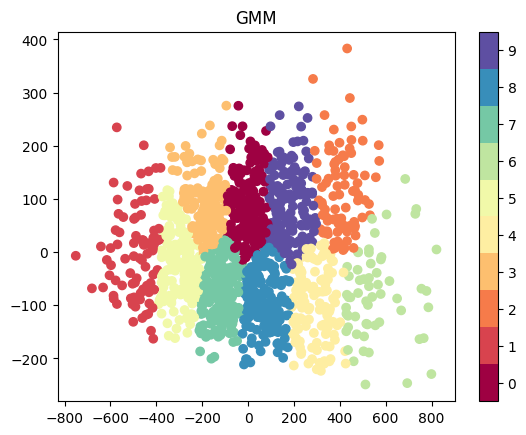

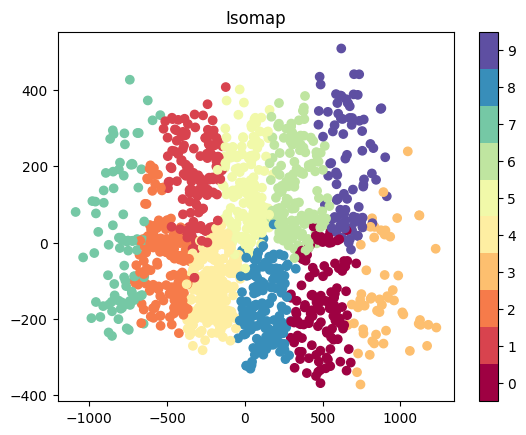

In [25]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

kmeans = KMeans(n_clusters=10)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

gmm = GaussianMixture(n_components=10)
gmm.fit(X)
y_gmm = gmm.predict(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap=plt.cm.get_cmap('Spectral', 10))
plt.title("PCA")
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)
plt.title("K-Means")
plt.show()

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_gmm, cmap=plt.cm.get_cmap('Spectral', 10))
plt.title("PCA")
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)
plt.title("GMM")
plt.show()

plt.scatter(X_iso[:, 0], X_iso[:, 1], c=y_kmeans, cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)
plt.title("Isomap")
plt.show()

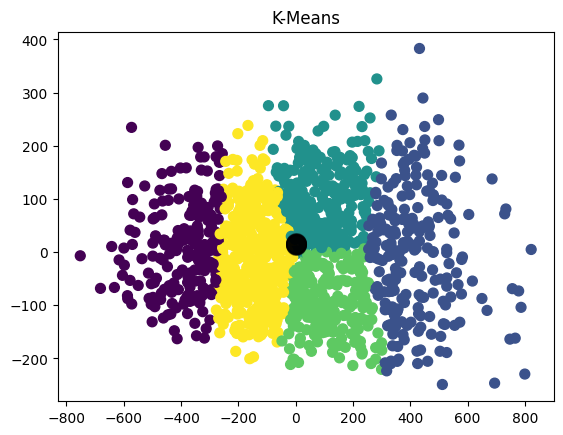

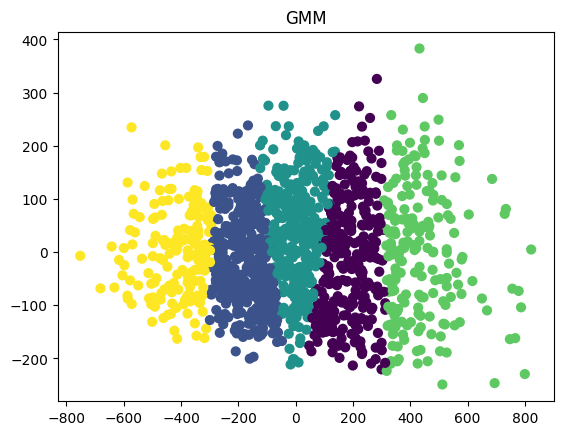

In [27]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.title("K-Means")
plt.show()

from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=5).fit(X)
labels = gmm.predict(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, s=40, cmap='viridis');
plt.title("GMM")
plt.show()